In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, zscore
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_csv('Train_dataset.csv').drop('Loan_ID', axis=1)

In [3]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train_df.dropna(inplace=True)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [7]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
train_df_Y = train_df[train_df['Loan_Status'] == 'Y']
train_df_N = train_df[train_df['Loan_Status'] == 'N']

In [9]:
train_df_Y.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [10]:
train_df_N.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5730.189189,1773.081081,153.378378,342.810811,0.574324
std,7560.806737,3663.685217,90.339150,72.787021,0.496124
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2863.500000,0.000000,100.000000,360.000000,0.000000
50%,3871.000000,0.000000,128.000000,360.000000,1.000000
75%,6046.250000,2356.250000,178.500000,360.000000,1.000000
max,81000.000000,33837.000000,570.000000,480.000000,1.000000


In [11]:
train_df_Y['zscore'] = zscore(train_df_Y['CoapplicantIncome'])
train_df_N['zscore'] = zscore(train_df_N['CoapplicantIncome'])

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
train_df_Y.shape, train_df_N.shape

((332, 13), (148, 13))

In [13]:
train_df_Y = train_df_Y[train_df_Y['zscore'] <= 2]
train_df_N = train_df_N[train_df_N['zscore'] <= 2]
print(train_df_Y.shape, train_df_N.shape)

(318, 13) (144, 13)


In [14]:
train_df = pd.concat([train_df_Y, train_df_N])

In [15]:
train_df.drop('zscore', axis=1, inplace=True)

In [16]:
train_df_Y['zscore'] = zscore(train_df_Y['ApplicantIncome'])
train_df_N['zscore'] = zscore(train_df_N['ApplicantIncome'])

train_df_Y = train_df_Y[train_df_Y['zscore'] <= 2]
train_df_N = train_df_N[train_df_N['zscore'] <= 2]

train_df = pd.concat([train_df_Y, train_df_N])

train_df.drop('zscore', axis=1, inplace=True)

/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From vers

Text(0.5, 1.0, 'Loan_status=N')

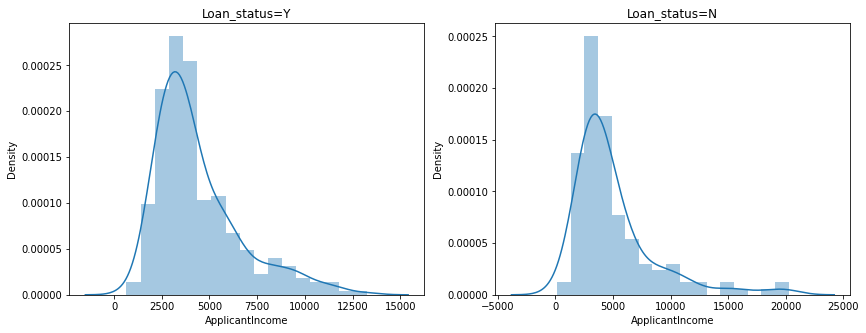

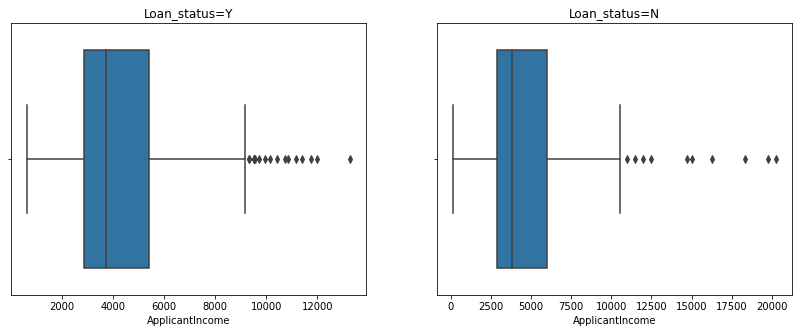

In [17]:
#display the numeric variables

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(train_df[train_df['Loan_Status'] == 'Y']['ApplicantIncome'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.distplot(train_df[train_df['Loan_Status'] == 'N']['ApplicantIncome'])
plt.title('Loan_status=N')

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(train_df[train_df['Loan_Status'] == 'Y']['ApplicantIncome'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.boxplot(train_df[train_df['Loan_Status'] == 'N']['ApplicantIncome'])
plt.title('Loan_status=N')

/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From vers

Text(0.5, 1.0, 'Loan_status=N')

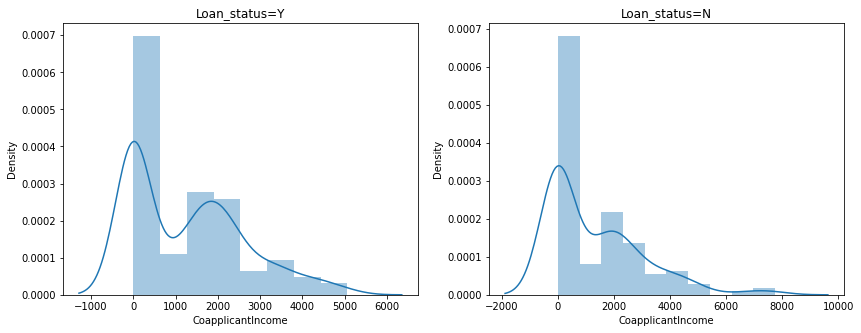

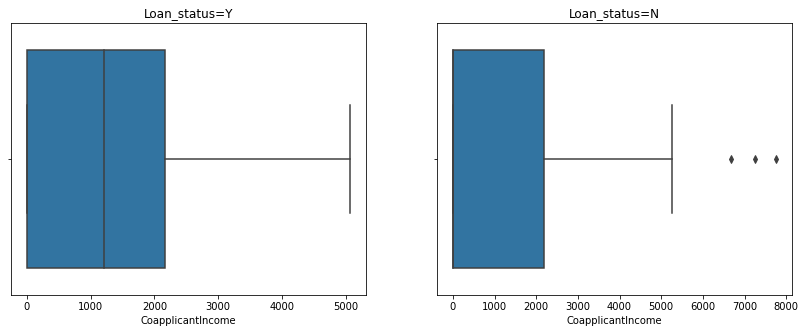

In [18]:
#display the numeric variables

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(train_df[train_df['Loan_Status'] == 'Y']['CoapplicantIncome'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.distplot(train_df[train_df['Loan_Status'] == 'N']['CoapplicantIncome'])
plt.title('Loan_status=N')

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(train_df[train_df['Loan_Status'] == 'Y']['CoapplicantIncome'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.boxplot(train_df[train_df['Loan_Status'] == 'N']['CoapplicantIncome'])
plt.title('Loan_status=N')

/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sanket/Personal/Github/Natural-Language-Processing/myenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From vers

Text(0.5, 1.0, 'Loan_status=N')

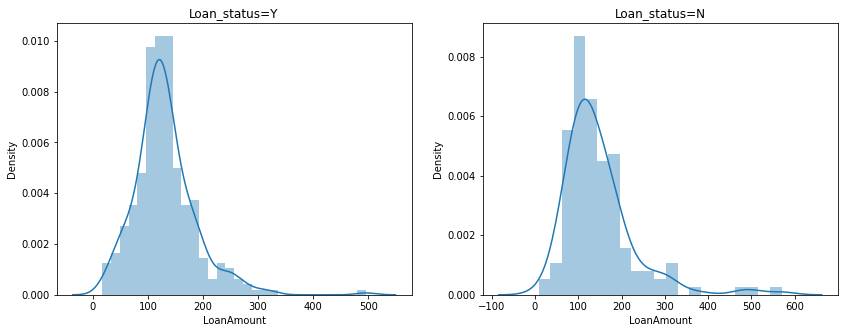

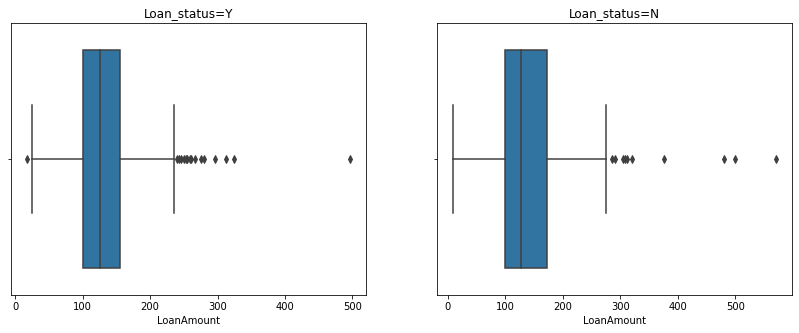

In [19]:
#display the numeric variables

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(train_df[train_df['Loan_Status'] == 'Y']['LoanAmount'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.distplot(train_df[train_df['Loan_Status'] == 'N']['LoanAmount'])
plt.title('Loan_status=N')

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(train_df[train_df['Loan_Status'] == 'Y']['LoanAmount'])
plt.title('Loan_status=Y')

plt.subplot(1,2,2)
sns.boxplot(train_df[train_df['Loan_Status'] == 'N']['LoanAmount'])
plt.title('Loan_status=N')

In [20]:
obj_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status', 'Credit_History']


#use chisquared test to test the dependency between the loan_status and other categorical variables
chisquare_df = pd.DataFrame([], columns=obj_cols, index = obj_cols)

for i in obj_cols:
    for j in obj_cols:
        cont = pd.crosstab(train_df[i], train_df[j])
        chisquare_df.loc[i,j] = chi2_contingency(cont)[1]        

chisquare_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
Gender,7.02596e-97,1.26231e-12,6.34522e-05,0.0981332,0.636545,0.0751624,0.121143,0.840212
Married,1.26231e-12,2.10134e-97,2.57724e-15,0.725687,0.999183,0.417611,0.0174722,0.644206
Dependents,6.34522e-05,2.57724e-15,1.68537e-280,0.698226,0.193237,0.0578672,0.503245,0.943604
Education,0.0981332,0.725687,0.698226,4.77614e-97,0.988166,0.287166,0.181253,0.25397
Self_Employed,0.636545,0.999183,0.193237,0.988166,2.53586e-96,0.609316,0.192213,0.316735
Property_Area,0.0751624,0.417611,0.0578672,0.287166,0.609316,1.79857e-190,0.00240892,0.433945
Loan_Status,0.121143,0.0174722,0.503245,0.181253,0.192213,0.00240892,2.38905e-97,2.34039e-29
Credit_History,0.840212,0.644206,0.943604,0.25397,0.316735,0.433945,2.34039e-29,1.23157e-96


Inference:                       
1) 'Loan_Status' has weak correlation with 'Self_Employed', 'Gender' and 'Dependents'                
2) 'Loan_Status' has moderate correlation with 'Married' and 'Education'                  
3) 'Loan_Status' has better correlation with 'Property_Area'            

In [21]:
#use one way anova to find the relation between the object type and the float or int type
num_cols1 = train_df.select_dtypes('float64').columns
num_cols2 = train_df.select_dtypes('int64').columns

num_cols = num_cols1.append(num_cols2)

In [22]:
#use one way anova to test the relation between the numeric and categorical variable
anova_df = pd.DataFrame([], columns=obj_cols, index = num_cols)

for i in num_cols:
    for j in obj_cols:
        model = ols(i+' ~ C('+j+')', train_df).fit()
        anova_df.loc[i,j] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']

In [23]:
anova_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
CoapplicantIncome,1.4092e-05,2.09228e-07,0.989697,0.344905,0.391019,0.114135,0.77191,0.38099
LoanAmount,0.0374105,0.00404857,0.119703,0.000283708,0.134341,0.0785163,0.0149933,0.820205
Loan_Amount_Term,0.0917919,0.0143925,0.0520884,0.0247918,0.191034,0.318941,0.839728,0.512406
Credit_History,0.708385,0.549077,0.944188,0.193087,0.229095,0.435723,4.43646e-35,0
ApplicantIncome,0.23107,0.393975,0.316936,0.000102186,0.00015762,0.106826,0.0233282,0.941846


Inference:                      
(1) 'Loan_Status' has a weak correlation with 'ApplicantIncome' and 'Loan_Amount_Term'                
(2) 'Loan_Status' has a moderate correlation with 'CoapplicantIncome' and 'LoanAmount'               
(3) 'Loan_Staus' has a better correlation with 'Credit_History'            

In [24]:
train_final = train_df.drop(['Loan_Status'], axis=1)


train_final['Gender'] = train_final['Gender'].replace({'Male':0, 'Female':1})
train_final['Married'] = train_final['Married'].replace({'No':0, 'Yes':1})
train_final['Dependents'] = train_final['Dependents'].replace({'0':0, '1':1, '2':2 , '3+':3})
train_final['Education'] = train_final['Education'].replace({'Graduate':0, 'Not Graduate':1})
train_final['Self_Employed'] = train_final['Self_Employed'].replace({'No':0, 'Yes':1})
train_final['Property_Area'] = train_final['Property_Area'].replace({'Urban':0, 'Rural':1, 'Semiurban':2})

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_final[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(train_final[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
train_final[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
2,0.141911,0.000000,0.101604,0.72973
3,0.121147,0.304258,0.197861,0.72973
4,0.291291,0.000000,0.235294,0.72973
5,0.262262,0.541419,0.459893,0.72973
6,0.108699,0.195613,0.153298,0.72973


In [26]:
train_final.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [27]:
X = train_final
y = train_df['Loan_Status']

train_x, val_x, train_y, val_y = train_test_split(X,y, test_size = 0.2, random_state=100)

train_y = pd.DataFrame(train_y)
val_y = pd.DataFrame(val_y)

In [28]:
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
163,0,1,2,0,0,0.200020,0.186710,0.265597,0.729730,1.0,1
252,0,0,0,1,1,0.121147,0.279613,0.169340,0.729730,1.0,1
191,0,0,0,0,0,0.590051,0.000000,0.276292,0.729730,1.0,2
189,0,1,0,0,0,0.457003,0.000000,0.319073,0.324324,1.0,1
552,0,1,1,0,0,0.158492,0.419355,0.265597,0.729730,1.0,0


In [29]:
### Adding Target Variable(Loan Status) in front (as a first column) as it is requirement for deploying a model on Sagemeker.

#concatenate split training features
train_updated = train_y.join(train_x)

#concatenate split validation features
val_updated = val_y.join(val_x)

In [30]:
columns = train_updated.columns

In [31]:
train_updated.head()

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
163,Y,0,1,2,0,0,0.200020,0.186710,0.265597,0.729730,1.0,1
252,Y,0,0,0,1,1,0.121147,0.279613,0.169340,0.729730,1.0,1
191,N,0,0,0,0,0,0.590051,0.000000,0.276292,0.729730,1.0,2
189,Y,0,1,0,0,0,0.457003,0.000000,0.319073,0.324324,1.0,1
552,Y,0,1,1,0,0,0.158492,0.419355,0.265597,0.729730,1.0,0


In [32]:
#import the new updated datasets
train_updated.to_csv('Train_final.csv', index=False, header=False, columns=columns)
val_updated.to_csv('Val_final.csv',index=False, header=False, columns=columns)

In [33]:
test_df = pd.read_csv('Test_dataset.csv').drop('Loan_ID', axis=1)

In [34]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [35]:
test_df['Gender'] = test_df['Gender'].replace({'Male':0, 'Female':1})
test_df['Married'] = test_df['Married'].replace({'No':0, 'Yes':1})
test_df['Dependents'] = test_df['Dependents'].replace({'0':0, '1':1, '2':2 , '3+':3})
test_df['Education'] = test_df['Education'].replace({'Graduate':0, 'Not Graduate':1})
test_df['Self_Employed'] = test_df['Self_Employed'].replace({'No':0, 'Yes':1})
test_df['Property_Area'] = test_df['Property_Area'].replace({'Urban':0, 'Rural':1, 'Semiurban':2})

In [36]:
test_df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(test_df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
test_df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.078865,0.000000,0.157088,0.746835
1,0.042411,0.062500,0.187739,0.746835
2,0.068938,0.075000,0.344828,0.746835
3,0.032263,0.106083,0.137931,0.746835
4,0.045168,0.000000,0.095785,0.746835


In [37]:
#import the new updated datasets
test_df.to_csv('Test_final.csv', index=False)

In [38]:
#create a text file which has list of columns
with open('loan_column_list.txt', 'w') as f:
    f.write(','.join(columns))